# Codecademy OK-Cupid Data Science Project

The aims of this project is to explore the data provided by OK-Cupid and use machine learning methods to answer a question posited by myself. 

- First, I will explore the data provided to see what types of information has been provided.
- Next, I will pose a question I wish to answer using machine learning methods
- Then, I will clean and prepare the data to begin finding an answer to my question.

In [2]:
#importing the packages I believe I will need for some initial data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#loading the data into the profiles variable
profiles = pd.read_csv("profiles.csv", encoding = "utf-8")

#printing the first 5 rows of data to explore what we have.
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
#showing the column information and datatypes
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

# Initial Thoughts

The data contains 31 providing a wealth of information. Each person presents basic information such as age, body type, diet etc. This is followed by 9 questions that each person has answered about a particular topic. Then followed by further information about likes/dislikes, religion, languages etc. 

There appears to be a lot of missing data in some of the columns where someone has chosen to not provide the information, as well as a large variety of entries in some of them. Some columns appear to have apostrophes replaced with a string of values which would need addressing if we were to use model on them. The data information is summarized below.

- __age:__ The age of the individual (integer)
- __body_type:__ The individuals perceived body type (categorical)
- __diet:__ The individuals diet (categorical)
- __drinks:__ The self described drinking frequency (categorical)
- __drugs:__ Drug taking frequency (categorical)
- __education:__ The education level of the individual (categorical)
- __ethnicity:__ The ethnicity of the individual (categorical)
- __height:__ The height in inches (continuous)
- __income:__ Income of the individual (integer)
- __job:__ The field of their employment (categorical)
- __last_online:__ The last time the user was online (date)
- __location:__ The current place of residence (categorical)
- __offspring:__ If they have children or if they plan to (categorical)
- __orientation:__ Sexual orientation of the person (categorical)
- __pets:__ If they have pets, or pet likes (categorical)
- __religion:__ Current religious views (categorical)
- __sex:__ The gender of the indivudual (categorucal)
- __sign:__ The star sign of the individual (categorical)
- __smokes:__ Smoker status of the individual (categorical)
- __speaks:__ Spoken languages (categorical)
- __status:__ Current relationship status (categorical)

The users were given 9 open ended questions to answer

- __essay0:__ A self summary of the person
- __essay1:__ What they are currently doing with their life
- __essay2:__ I'm really good at...
- __essay3:__ The first thing people notice about me
- __essay4:__ Favourite books, movies, show, music and food
- __essay5:__ The six thing I could not be without
- __essay6:__ I spend a lot of time thinking about..
- __essay7:__ On a typical Friday evening I am..
- __essay8:__ The most private thing I'm willing to admit
- __essay9:__ You should message me if...

The next task will be to explore the data in each column to see what it tells us about the types of people we have data on.

# Gender Balance

We can see from the bar plot below that there is a significant difference in the amount of males and females in the data set. There numbers around 36,000 males to around 24,000 females. It wouldn't be surprising if this led to imbalances in the rest of the data categories. It may be pertinent to balance the number of males and females used to model later on for fairness. I would do this by taking a random sample of each sex up to a currently undertermined limit.

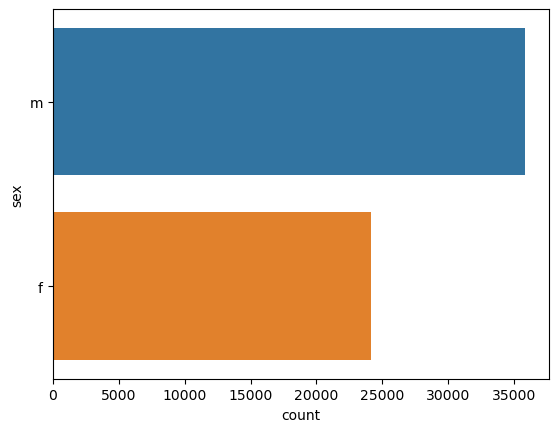

sex
m    35829
f    24117
Name: count, dtype: int64

In [6]:
#bar plot of the gender count in the dataset
sns.countplot(data = profiles, y = "sex", hue = "sex")
plt.show()

profiles.sex.value_counts()

# Age Distribution

From the histogram below we can see that the majority of participants in the data setare between the ages of 18 and 40. The largest group being between the ages of roughly 23 and 28 years old.

Looking at the distributions between male and female we can see that in the majority of the age bands there are more males and females until the "older" groups where the distributions are broadly even.

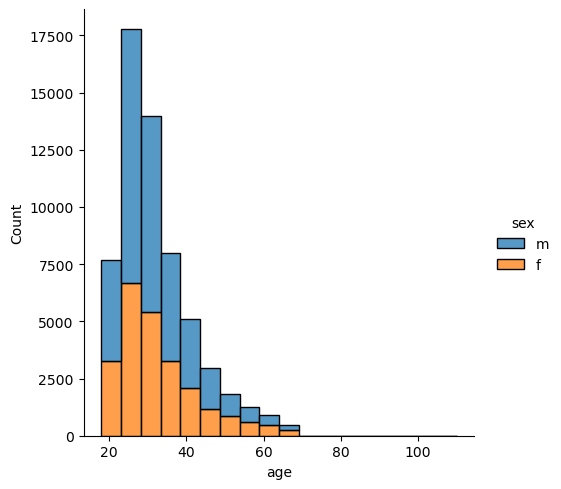

In [8]:
#plotting a chart to find the distribution of the ages of those in the dataset
age_plot = sns.displot(data = profiles, x = "age", kind = "hist", hue = "sex", binwidth = 5, multiple = "stack")


# Body Type

Looking at the body type variable, the majority of males would describe themselves as either athletic, average or fit, whereas the majority of females would describe themselves as average, fit or curvy. Some of the categories are clearly typically associated with a single gender with curvy and full figured used almost exclusively by females, while athletic and a little extra have significantly more males.


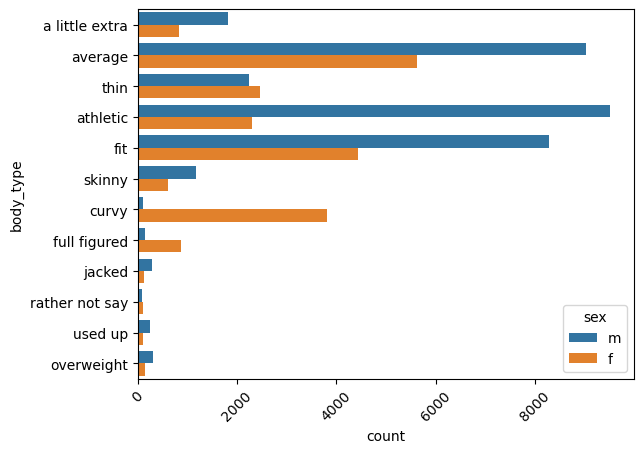

In [10]:
#plot of the body type categories
sns.countplot(data = profiles, y = "body_type", hue = "sex")
plt.xticks(rotation = 45)
plt.show()

# Diet

It appears that the diet category has the mainstream descriptors such as "anything", "vegetarian", "vegan", "halal", "koscher" and "other", but comes with additional information to indicate the proportion of the diet they follow using the words "strictly" and "mostly". The data may be best served by putting them into the overall categories as distinguishing between someone who is "mostly vegan" and "strictly vegan" would seem minimal in their difference.

Looking at the simplified diet section, we can see that the majority of people describe themselves as eating anything, so we can assume no string diet. There are very few instances of someone describing themselves as halal or koscher in the datset, this could indicate a lack of ethnicities who typically follow this diet in the dataset. An interesting note is that males are highly more likely to describe their diet as anything, whereas more females describe themselves as vegetarian. Roughly equal amount of each gender describe themselves as being vegan.

In [12]:
#splitting the string and taking the end element of the string
profiles["diet_clean"] = profiles.diet.str.split().str.get(-1)

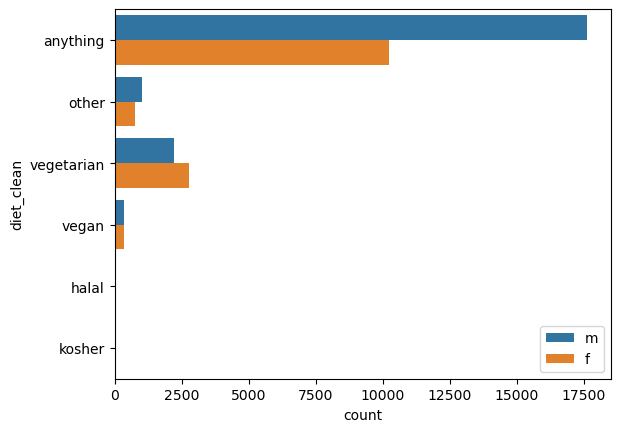

diet_clean
anything      27881
vegetarian     4986
other          1790
vegan           702
kosher          115
halal            77
Name: count, dtype: int64

In [13]:
#plot of the diets of those in the dataset
sns.countplot(data = profiles, y = "diet_clean", hue = "sex")
plt.legend(loc = "lower right")
plt.show()

profiles.diet_clean.value_counts()

# Drinks

The drinks category indicates the drinking habit of the person in the data. Across all categories males are more likely to drink in any capacity compared to females with the majority of participants describing themsevles as social drinkers.

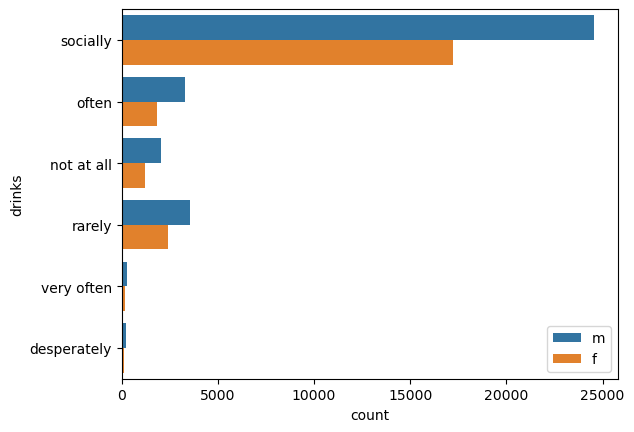

In [15]:
#count plot of the drinks variable separated by gender
sns.countplot(data = profiles, y = "drinks", hue = "sex")
plt.legend(loc = "lower right")
plt.show()

# Drugs

From the count plot below we can see that the majority of people in the datset have never tried drugs, a smaller proportion (~7000) sometimes do and a very small proportion (<500) often take drugs. It appears that men are marginally more likely to participate in drugs with roughly 19% of males having indcated drug taking, whereas only 15% of females had done so (of those who answered the question).

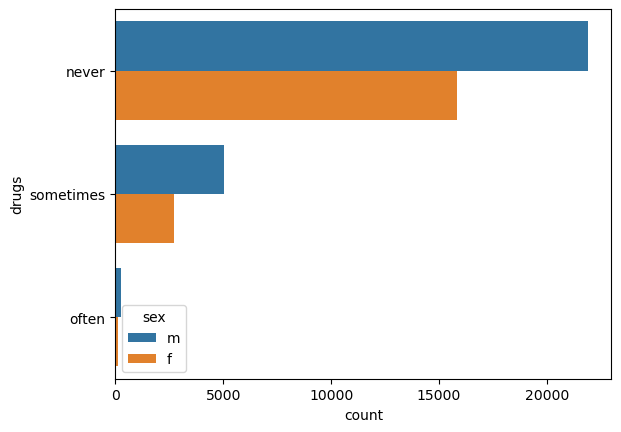

sex  drugs    
f    never        0.848649
     sometimes    0.144489
     often        0.006863
m    never        0.804549
     sometimes    0.185089
     often        0.010362
Name: proportion, dtype: float64

In [17]:
#bar plot of the drugs category
sns.countplot(data = profiles, y = "drugs", hue = "sex")
plt.show()

profiles.groupby(by = "sex").drugs.value_counts(normalize = True)

# Education

Looking at the plot below we can see that education has a wide variety of descriptors to go along with the level of education a person has indicated. The majority of people have either graduated from college/university, graduated from with a masters, or are currently working on college/university. Space camp appears to have a reasonable number of people who have or are currently attending it. A very small proportion of the data has people who have dropped out of a course.

Looking at the gender differences, males have higher counts in each category which is unsurprising given the roughly 12000 more males in the dataset. However there are some categories which are close, or females have higher counts in. For example, roughly equal numbers of the males and females in the data have graduated with a masters, whereas more females are currently working on one. It is good to see that this is similar for higher levels of education such as med school and law school. An interesting note is it appears that males are more likely to drop out of education, roughly 0.2% of males vs 0.08% of females dropping out of college (of those who answered the question).

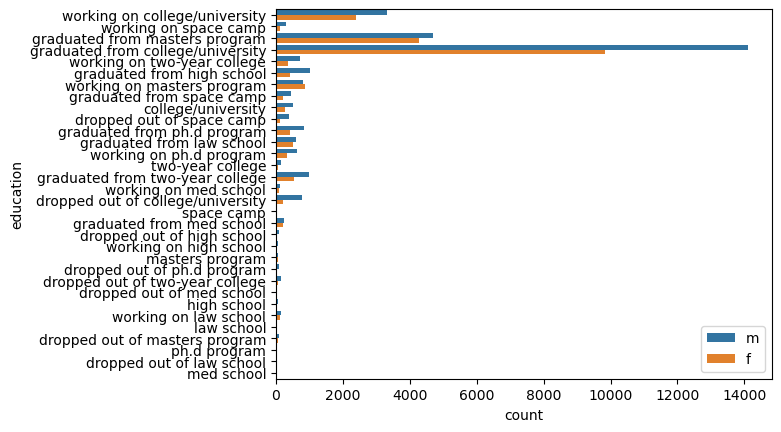

sex  education                        
f    graduated from college/university    0.452968
     graduated from masters program       0.196180
     working on college/university        0.110216
     working on masters program           0.039761
     graduated from two-year college      0.025035
     graduated from law school            0.023378
     graduated from ph.d program          0.019374
     graduated from high school           0.018776
     working on two-year college          0.016521
     working on ph.d program              0.015601
     college/university                   0.012931
     dropped out of college/university    0.010262
     graduated from med school            0.009526
     graduated from space camp            0.009296
     working on space camp                0.006305
     dropped out of space camp            0.005936
     working on law school                0.005476
     working on med school                0.004602
     two-year college                     0

In [19]:
#plot of the education category
sns.countplot(data = profiles, y = "education", hue = "sex")
plt.legend(loc = "lower right")
plt.show()

profiles.groupby(by = "sex").education.value_counts(normalize = True)

# Height

Perhaps unsurprisingly, on average males are taller than females with the average height of males measuring roughly 70 inches, and females measuring closer to 62 inches.

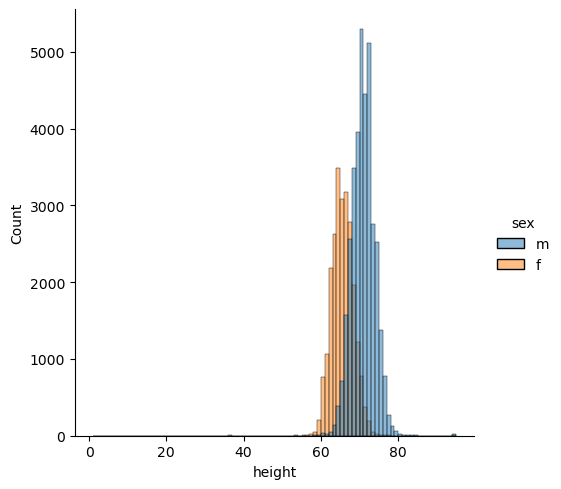

In [21]:
#distribution of heights by gender
sns.displot(data = profiles, x = "height", hue = "sex", binwidth = 1)
plt.show()

# Income

From the plot below we can see that the majority of particpants earn below roughly $150,000 with incredibly small numbers earning over this. Looking at the value counts of the income data, we can see that the majority have an income level of -1, this is likely to indicate no income given. This would explain the size differences in the bars, skewing the proportions.

In the 2nd plot I have removed the -1 values so we can see the distribution more clearly. We can see that, of those who provided their income, most earn 20,000 and below, which a reasonable number indicating they earn 1,000,000. In all categories where income is given, the male proportion is larger than the female, this difference becomes more inabalanced the higher the income bracket.

income
-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: count, dtype: int64


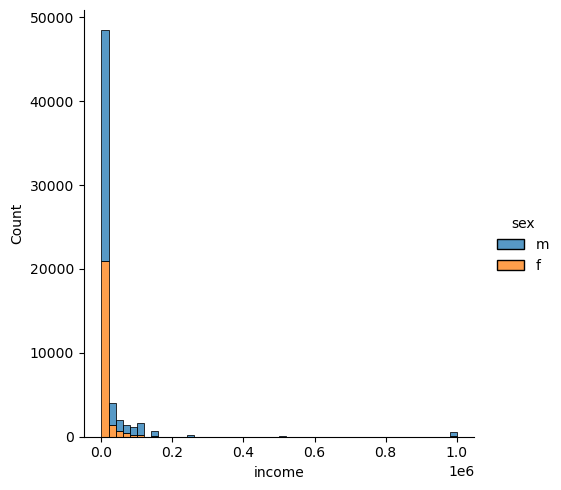

In [23]:
#count of the income data
print(profiles.income.value_counts())

#distribution of income levels, separated by gender
sns.displot(data = profiles, x = "income", hue = "sex", multiple = "stack", kind = "hist", bins = 50)
plt.show()

sex  income 
f    20000      1031
     40000       339
     30000       320
     50000       311
     80000       261
     100000      256
     60000       221
     70000       166
     1000000     125
     150000       75
     250000        5
     500000        3
m    20000      1921
     100000     1365
     80000       850
     30000       728
     40000       666
     50000       664
     150000      556
     70000       541
     60000       515
     1000000     396
     250000      144
     500000       45
Name: count, dtype: int64


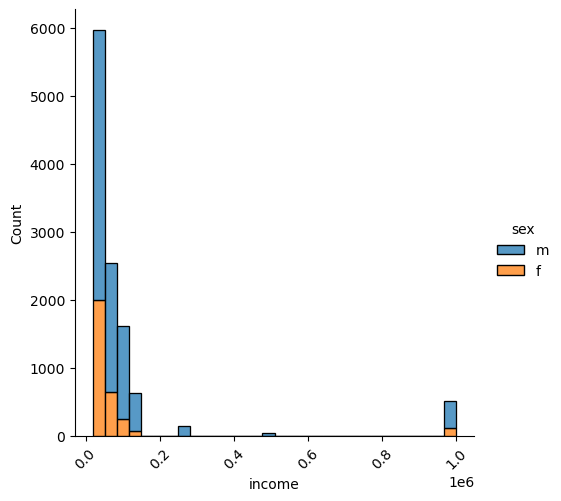

In [24]:
#splitting the data for incomes below 200,000
income_given = profiles[profiles.income > -1]

print(income_given.groupby("sex").income.value_counts())

#plot of this data
sns.displot(data = income_given, x = "income", hue = "sex", multiple = "stack", kind = "hist", bins = 30)
plt.xticks(rotation = 45)
plt.show()

# Job

The first plot shows the counts of the job data, showing that the majority of people do not fall into the categories given on the website by choosing other. The next largest categories are "student, "STEM", "Computer/Hardware/Software", following closely by "Sales" and "artistic" careers. Very few indicate they are unemployed and there are a small number of retirees. 

The second plot shows this data by sex to identify any gender imbalances in certain careers. Broadly similar numbers of males and females indicate they are in the other field. However, the STEM and Computer fields are heavily biased towards males by a ratio of roughly 5:1. There are very few categories where there is parity between males and females, the closest would be the Law and Government categories which see broadly even numbers. However, the Healthcare, Education and Clerical categories sees more female employment which has historically been the case due to stereotyping. It doesn't indicate in the Health category what type of healthcare role females undertake so it isn't possible to see if this is as doctors or as other healthcare professionals.

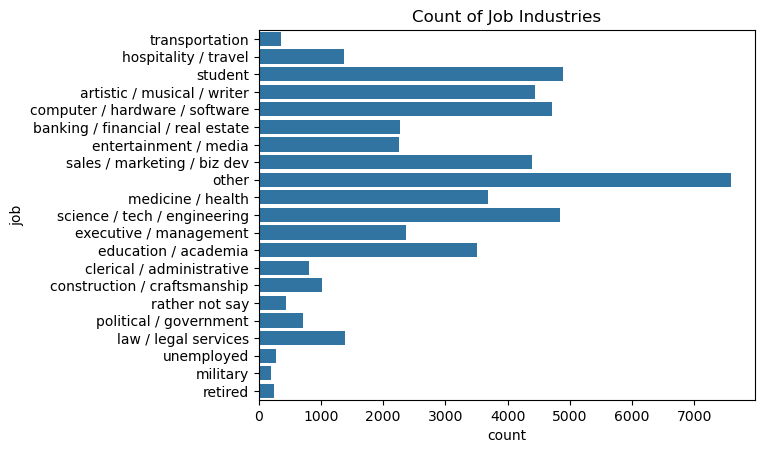

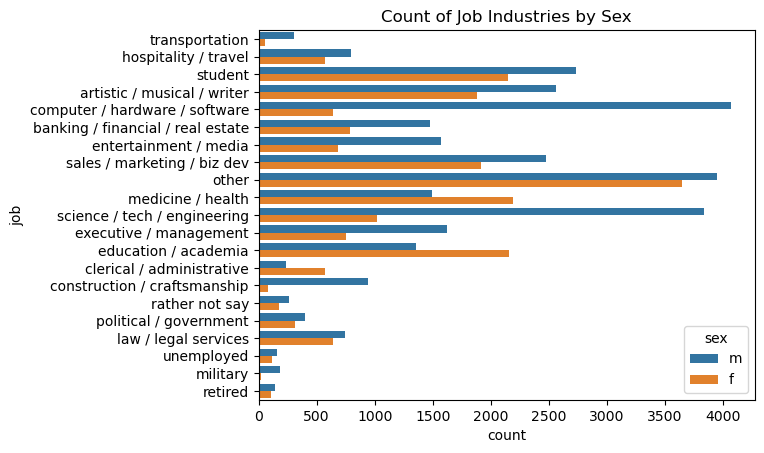

In [26]:
#count plot of jobs category
sns.countplot(data = profiles, y = "job")
plt.title("Count of Job Industries")
plt.show()
sns.countplot(data = profiles, y = "job", hue = "sex")
plt.title("Count of Job Industries by Sex")
plt.show()

# Orientation

Looking at the orientation category we can see that the majority of people in the data indicate that they are straight, which much smaller proportions indicating either gay or bisexual. Of the two latter categories, of those are are bisexual there are significantly more women compared to men and this difference reverses for the gay category. The LGBTQ make up roughly 14% of the people in the dataset.

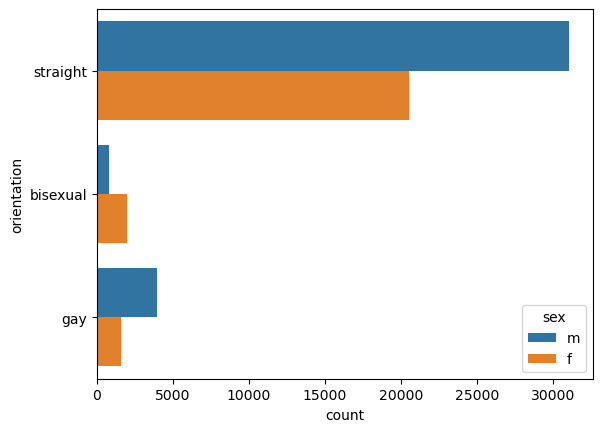

orientation
straight    0.860875
gay         0.092967
bisexual    0.046158
Name: proportion, dtype: float64

In [28]:
#plot of the orientation category by sex
sns.countplot(data = profiles, y = "orientation", hue = "sex")
plt.show()

profiles.orientation.value_counts(normalize = True)

# Religion

Much like the education and diet categories, there are descriptors to go along with the branch of religion a person follows. It would be best to split this into just the main branches.

From the graph below we can see that the majority of people in the dataset describe themselves as agnostic, followed closely by other for the people who do not fall under the popular branches of religion. Since this data is from America, Middle Eastern and Asian religions appear in low representations in comparison to mainstream followings in the U.S. However, Judaism and Buddhism do have a reasonble proportion (6% and 4% respectively).

Looking at it by gender, the proportion of females who identify as agnostic or atheist are significantly lower than one might expect if the data was proportionaly distributed. Due to the larger number of males in the data, it makes sense that there appears to be larger men for each category. Judaism bucks the trend slightly with almost parity between the sexes.

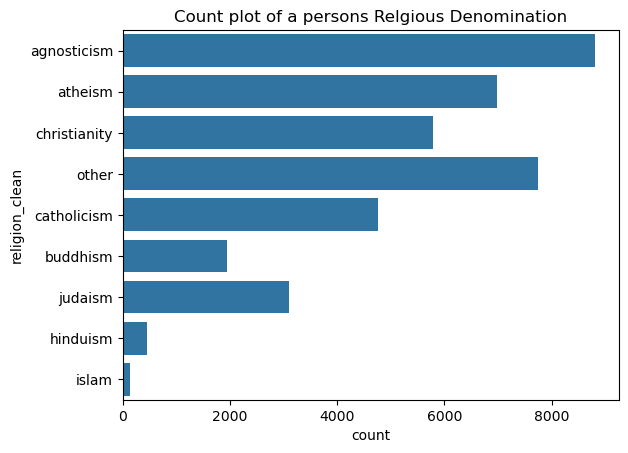

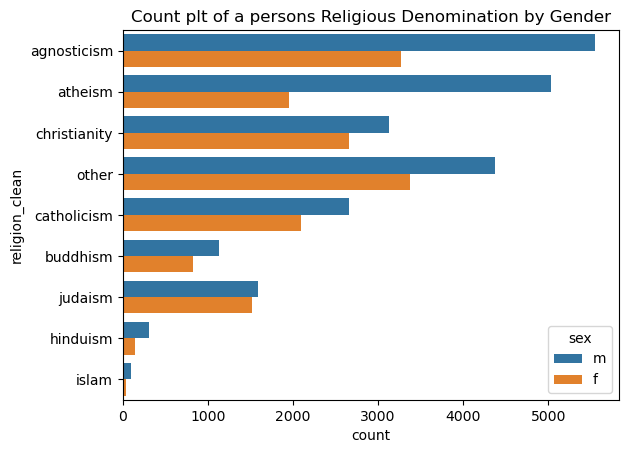

In [30]:
#cleaning the religion data to only include the religion branch
profiles["religion_clean"] = profiles.religion.str.split().str.get(0)

#plot of the religion category
sns.countplot(data = profiles, y = "religion_clean")
plt.title("Count plot of a persons Relgious Denomination")
plt.show()

#plot of religion split by gender
sns.countplot(data = profiles, y = "religion_clean", hue = "sex")
plt.title("Count plt of a persons Religious Denomination by Gender")
plt.show()

# Sign

From the plot below (now commented out), like most other categories, there are additional descriptors to go along with the star sign of a person. It would be best to remove this and focus solely on the sign.

After cleaning the data and showing the counts we can see that broadly there are similar numbers of each star sign in the dataset at the moment. Leo being marginally the most represented and capricorn the least. From the plot, which has been split by gender, broadly the proportions are similar between males and females in the dataset. 

sign_clean
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: count, dtype: int64


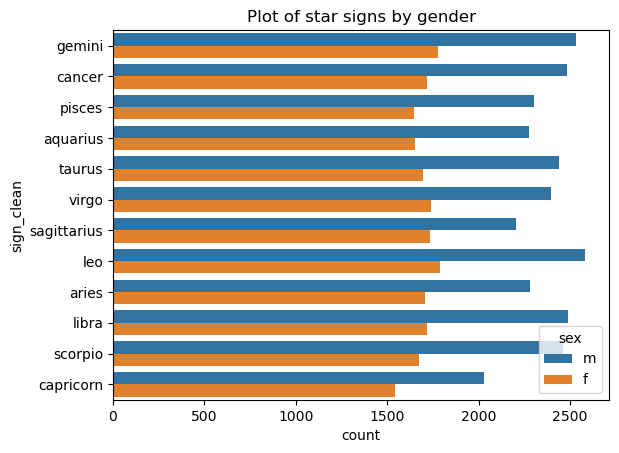

In [32]:
#plot of the data held in the sign category
# sns.countplot(data = profiles, y = "sign") #commented out due to significant number of categories making them illegible.
# plt.title("Plot of the numbers of each Star Sign")
# plt.show()

#splitting the data held in the sign column and taking only the first element of the list
profiles["sign_clean"] = profiles.sign.str.split().str.get(0)

#printing the count of the data
print(profiles.sign_clean.value_counts())

#graph of the star signs
sns.countplot(data = profiles, y = "sign_clean", hue = "sex")
plt.title("Plot of star signs by gender")
plt.show()

# Smoker Status

Finally, looking at the smoking status, the majority of people in the data do not smoke. This translates to roughly 79% of males and 83% of females, so males are marginally more likely to smoke in some capacity (of those who answered the question).

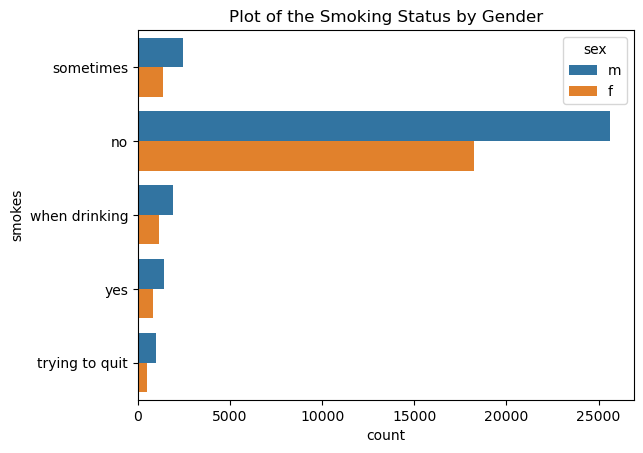

sex  smokes        
f    no                0.827600
     sometimes         0.061908
     when drinking     0.052663
     yes               0.036075
     trying to quit    0.021754
m    no                0.791961
     sometimes         0.074794
     when drinking     0.058018
     yes               0.044333
     trying to quit    0.030894
Name: proportion, dtype: float64


In [34]:
#plot of the smoking status of the dataset
sns.countplot(data = profiles, y = "smokes", hue = "sex")
plt.title("Plot of the Smoking Status by Gender")
plt.show()

#value counts of the smoker status
print(profiles.groupby("sex").smokes.value_counts(normalize = True))

# Modelling on the Data

## Cleaning the Data

I want to consider if it is possible to use the essay sections of the dataset to make a prediction on an aspect of each persons data. To accomplish this I will first need to clean the data by removing any superfluous characters and code from the strings when it has been pulled. This is mostly characters to indicate line breaks when the person has typed in the information.

In [36]:
essay_columns = ["essay0", "essay1", "essay2", "essay3", "essay4", "essay5", "essay6", "essay7", "essay8", "essay9"]
for column in essay_columns:
    profiles[column] = profiles[column].str.replace("<br />", "") #removing the <br /> part of the strings
    profiles[column] = profiles[column].str.replace("\n", "") #removing the \n part of the string
    profiles[column] = profiles[column].str.strip() #stripping any whitespace


print(profiles.essay9.head()) #checking information has been stripped.

0    you want to be swept off your feet!you are tir...
1                                                  NaN
2    you are bright, open, intense, silly, ironic, ...
3                                you feel so inclined.
4                                                  NaN
Name: essay9, dtype: object


## Dealing with Absent Data

Looking at the counts below, we can see that there is a large discrepency in the number of unanswered parts of the essay sections with roughly 90% of people completing the about me section, down to 60% completing the "most private thing I'm willing to admit" section. First I will see what amount of data we have left if we were to drop all rows that have a NaN in any column.

Looking at the bottom counter we would only have 4407 remaining pieces of data, less than 10% of the original set if we drop all NaN's from the dataset. This would likely be sufficient to train a basic model on.

In [138]:
#finding out the NaN's in the dataset
print(profiles[essay_columns].isna().sum())

#creating a new dataframe without NaN values
profiles_dropna = profiles.dropna()

#counting the data remaining
print(profiles_dropna.info())



essay0     5488
essay1     7572
essay2     9638
essay3    11476
essay4    10537
essay5    10850
essay6    13771
essay7    12451
essay8    19225
essay9    12603
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 4407 entries, 0 to 59944
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4407 non-null   int64  
 1   body_type       4407 non-null   object 
 2   diet            4407 non-null   object 
 3   drinks          4407 non-null   object 
 4   drugs           4407 non-null   object 
 5   education       4407 non-null   object 
 6   essay0          4407 non-null   object 
 7   essay1          4407 non-null   object 
 8   essay2          4407 non-null   object 
 9   essay3          4407 non-null   object 
 10  essay4          4407 non-null   object 
 11  essay5          4407 non-null   object 
 12  essay6          4407 non-null   object 
 13  essay7          4407 non-null   object 
 14 

In the models, there will be several values that can be evaluated below is a quick diagram:
![](https://miro.medium.com/max/1400/1*UVP_xb4F6J-M-xH3haz5Jw.png)
here is a quick description of the metrics:

- **Accuracy:** is the correct values divided by total values
- **Precision:** is the True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the true positives divided by the actual positive values.
- **Recall:** is the True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true positives divided by the positive guesses.
- **F1-score:** is a blended score of precision and recall which balances both values.
- **Macro Avg:** is the unweighted mean value of precision and recall. 
- **Weighted Avg:** is the weighted mean value of precision and recall by the support values for each class.
- **Support:** is the number of observations in class to predict. 

## Classify sex based on essays

I want to see if it possible to find someones sex using the way they have answered the first essay (about me) question and the language they have used. I am making an assumption that the sex has not been mentioned in the text itself and that they have always referred to themselves in the first person (I prounoun) and not third person (he/she/them pronoun)

In [142]:
#splitting into data and targets
data = profiles_dropna["essay0"]
target = profiles_dropna["sex"]

#importing methods
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#preparing data for use in Naive Bayes algorithm
counter = CountVectorizer()

#splitting the data into a train set and test set
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 0)

#fitting the counter to the language
counter.fit(data)

#transforming the training data.
x_train_counts = counter.transform(x_train)

#creating and fitting the model
model = MultinomialNB()
model.fit(x_train_counts, y_train)

#evaluating model
x_test_counts = counter.transform(x_test)
predictions = model.predict(x_test_counts)
score = accuracy_score(y_test, predictions)
print(f"The model is {score} accurate when predicting a persons sex based on the about me essay")

#The model is 67% accurate in predicting a persons sex from the first essay question.

#printing the classification report
print(classification_report(y_test, predictions))

The model is 0.6689342403628118 accurate when predicting a persons sex based on the about me essay
              precision    recall  f1-score   support

           f       0.61      0.60      0.60       372
           m       0.71      0.72      0.72       510

    accuracy                           0.67       882
   macro avg       0.66      0.66      0.66       882
weighted avg       0.67      0.67      0.67       882



### Initial Thoughts

The model is 67% accurate in predicting a persons sex based on the first essay question. It is entirely likely that other gendered words outside of pronouns would have been mentioned and the model could have picked up on these. I wonder if another essay is a better predictor

In [119]:
best_score = 0
best_essay = ""

essay_scores = []

for column in essay_columns:
    data = profiles_dropna[column]
    target = profiles_dropna["sex_classifier"]
    counter = CountVectorizer()
    counter.fit(data)
    x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 0)
    x_train_counter = counter.transform(x_train)
    x_test_counter = counter.transform(x_test)
    model = MultinomialNB()
    model.fit(x_train_counter, y_train)
    prediction = model.predict(x_test_counter)
    score = accuracy_score(y_test, prediction)
    essay_scores.append(score)
    if score > best_score:
        best_score = score
        best_essay = column

print(f"The best essay is {best_essay} with an accuracy score of {best_score}")

The best essay is essay0 with an accuracy score of 0.6689342403628118


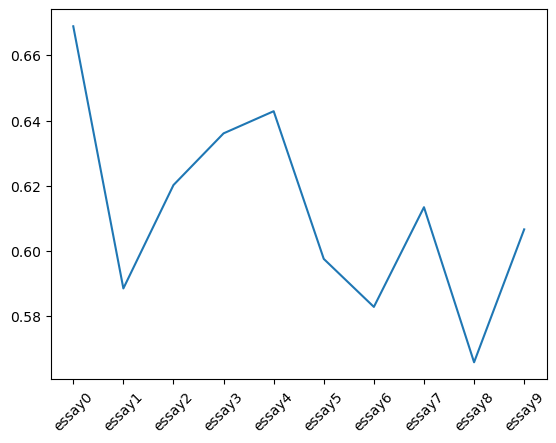

In [128]:
#plot of the scores per essay columns
plt.plot(essay_columns, essay_scores)
plt.xticks(rotation = 45)
plt.show()

Using a for loop and going through each essay, essay0 (about me) is the best essay to use as a classifier for sex. Considering the plot above, we can see an overall downwards trend in accuracy as the essay questions proceed from the "about me" to the "you should message me" essay. I wonder if all essays where combined into one column would this improve the accuracy of the model. This will be attempted below.

In [146]:
#combining the essay columns into one combined column.
profiles_dropna["essay_combined"] = profiles_dropna[essay_columns].apply(lambda x: " ".join(x.astype(str)), axis = 1)

#splitting into data and labels
data = profiles_dropna["essay_combined"]
labels = profiles_dropna["sex"]

#preparing data for use in Naive Bayes algorithm
counter = CountVectorizer()

#splitting the data into a train set and test set
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 0)

#fitting the counter to the language
counter.fit(data)

#transforming the training data.
x_train_counts = counter.transform(x_train)

#creating and fitting the model
model = MultinomialNB()
model.fit(x_train_counts, y_train)

#evaluating model
x_test_counts = counter.transform(x_test)
predictions = model.predict(x_test_counts)
score = accuracy_score(y_test, predictions)
print(f"The model is {score} accurate when predicting a persons sex based on the combined essays")

#the model is 71.9% accurate when prediction on the test data
print(classification_report(y_test, predictions))

The model is 0.7188208616780045 accurate when predicting a persons sex based on the combined essays
              precision    recall  f1-score   support

           f       0.63      0.80      0.70       372
           m       0.82      0.66      0.73       510

    accuracy                           0.72       882
   macro avg       0.72      0.73      0.72       882
weighted avg       0.74      0.72      0.72       882



## First model conclusion

After combining all of the essays onto one column, the model is now 72% accurate in predicting a persons sex based on what they've written. There is still the possibility that gendered language has been included in these essays which would point towards a persons gender, however on the balance of probability of all 4000 odd samples it would be unliklely a significant proportion would contain it. One aspect is the final essay "you should chat to me" which may include reference to the persons ideal partner, which might reference "girl/woman" if the person is male, and vice versa if they're female. Orientation isn't included in this so it would be interesting to investigate the orientation of the person when looking at their true gender vs prediction.

### Model Improvement: Expand data and removal of gendered words

In order to improve the model, only data that is missing from the essay columns will be dropped to expand the data available. Simultaneously, a loop will be used to replace possible gendered words with "person" and pronouns with "they" with the aim to see if this has influenced the previous model in any way.

In [148]:
#drop the rows with no information in the essay columns
profiles_dropna_essays = profiles.dropna(subset = essay_columns)
# print(profiles_dropna_essays.info()) #confirming equal number of data in essay columns and sex column 29866

#combining essays into one column
profiles_dropna_essays["essays_combined"] = profiles_dropna_essays[essay_columns].apply(lambda x: " ".join(x.astype(str)), axis = 1)
profiles_dropna_essays["essays_combined"] = profiles_dropna_essays["essays_combined"].str.lower()

#removal of potential gendered words
gendered_words = ["man", "woman", "men", "women", "guy", "girl"] #gendered words to reference others
gendered_pronouns = ["he", "she", "him", "her"] #gendered pronouns

for word in gendered_words: #for loop to replace gendered words with "person" using regex to hit whole words only
    profiles_dropna_essays.essays_combined = profiles_dropna_essays.essays_combined.str.replace(f"\b{word}\b", "person", regex = True)

for word in gendered_pronouns: #for loop to replace gendered pronouns with "they" using regex to hit whole words only
    profiles_dropna_essays.essays_combined = profiles_dropna_essays.essays_combined.str.replace(f"\b{word}\b", "they", regex = True)

#splitting data into features and target
features = profiles_dropna_essays["essays_combined"]
target = profiles_dropna_essays["sex"]

#instantiating a counter object
counter_2 = CountVectorizer()

#split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

#fitting the counter to the data
counter_2.fit(features)

#transforming the data
x_train_counts = counter_2.transform(x_train)
x_test_counts = counter_2.transform(x_test)

#creating model and fitting to data
model_2 = MultinomialNB()
model_2.fit(x_train_counts, y_train)

#evaluating the model
predictions = model_2.predict(x_test_counts)
score_2 = accuracy_score(y_test, predictions)
print(f"The model is {score_2} accurate when predicting a persons sex based on the combined essays")

#the new model is 77.2% accurate when predicting on the test data, compared to 71.9% accurate compared to the previous model. A 7.3% improvement over the previous model.

print(classification_report(y_test, predictions))

The model is 0.7720120522263141 accurate when predicting a persons sex based on the combined essays
              precision    recall  f1-score   support

           f       0.70      0.74      0.72      2379
           m       0.82      0.79      0.81      3595

    accuracy                           0.77      5974
   macro avg       0.76      0.77      0.76      5974
weighted avg       0.77      0.77      0.77      5974



### Investigating Predictions

Something I am curious about is there a subgroup of the population where the model is less accurate compared to others, specifically orientation and gender. To explore these I will create a new column in the data which stores the prediction based off of the combined essay and evaluate the proportion of correct classifications.

In [49]:
#checking the number of NaN's in orientation
# print(profiles_dropna_essays.info()) #all rows in the set have an orientation value

#creating the prediction column for the data
overall_predictions = model_2.predict(counter_2.transform(features))
profiles_dropna_essays["sex_prediction"] = overall_predictions

sex
m    0.60748
f    0.39252
Name: proportion, dtype: float64


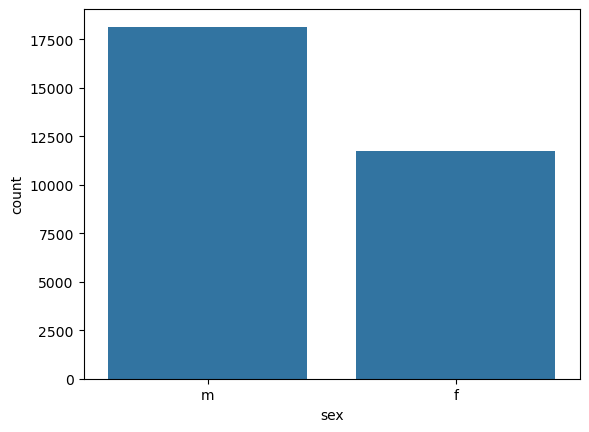

orientation  prediction_accuracy
bisexual     correct                 1410
             incorrect                289
gay          correct                 2569
             incorrect                506
straight     correct                23262
             incorrect               1830
Name: count, dtype: int64
orientation  prediction_accuracy
bisexual     correct                0.829900
             incorrect              0.170100
gay          correct                0.835447
             incorrect              0.164553
straight     correct                0.927068
             incorrect              0.072932
Name: proportion, dtype: float64


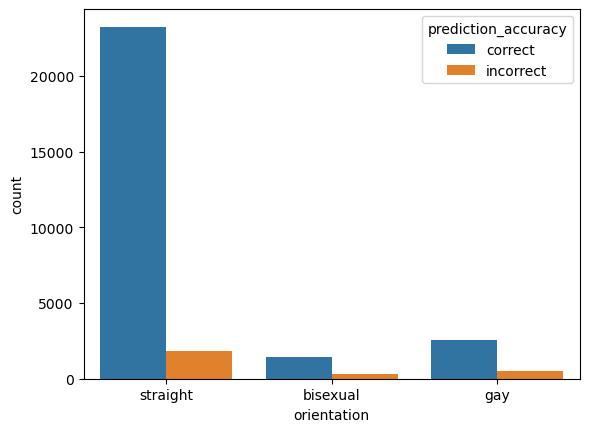

sex  prediction_accuracy
f    correct                0.892604
     incorrect              0.107396
m    correct                0.924709
     incorrect              0.075291
Name: proportion, dtype: float64


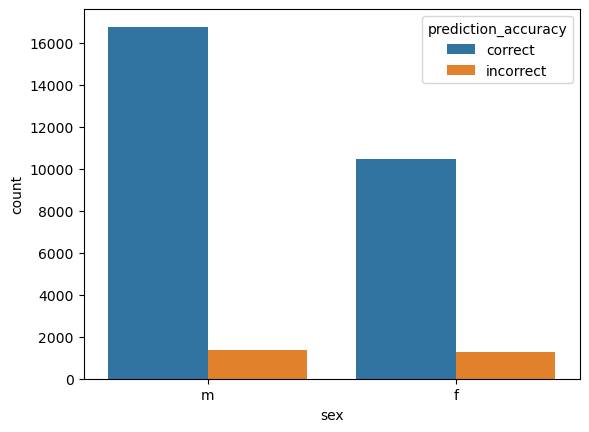

In [88]:
#creating a column to count the predictions
profiles_dropna_essays["prediction_accuracy"] = profiles_dropna_essays.apply(lambda x: "correct" if x["sex"] == x["sex_prediction"] else "incorrect", axis = 1)

#checking result
# print(profiles_dropna_essays[["sex", "sex_prediction", "prediction_accuracy"]].head(10))

#printing male and female numbers in the dataset
print(profiles_dropna_essays.sex.value_counts(normalize = True))

sns.countplot(data = profiles_dropna_essays, x = "sex")
plt.show()

#checking prediction values per orientation group.
print(profiles_dropna_essays.groupby("orientation").prediction_accuracy.value_counts())
print(profiles_dropna_essays.groupby("orientation").prediction_accuracy.value_counts(normalize = True))

#plot of the results
sns.countplot(data = profiles_dropna_essays, x = "orientation", hue = "prediction_accuracy")
plt.show()

#checking predicitons values per gender
print(profiles_dropna_essays.groupby("sex").prediction_accuracy.value_counts(normalize = True))

#plot of the results
sns.countplot(data = profiles_dropna_essays, x = "sex", hue = "prediction_accuracy")
plt.show()

### Evaluating Findings

Looking at the information above, it incorrectly classifies someone who identifies at straight 7.3% of the time. Whereas, it classifies people who are gay 16.5% of the time and bisexual 17% of the time. This is likely down to the proportion of the data that is made up by people describe their orientation as such. Straight people make up an overwhelming majority of the dataset, roughly 84%, which is the most likely cause of the bias. In order to improve the model further we would need more information from people who identify as gay or bisexual.

Considering misclassification based on gender, we can see that it misclassifies male participants 7.5% of the time, whereas the model misclassifies female 10.7% of the time which is 50% more frequently. This could be down to the fact that there are more males than females in the data (60% male vs 40% female)

Since it is impossible to know which rows where included in the training data compared to the test data we simply don't know the proportions that were included for the predictions. A possible way to investigate this further would be to limit data to equal numbers of straight, gay and bisexual people and use bootstrap aggregation to sample with replacement. 

sex
m    0.620954
f    0.379046
Name: proportion, dtype: float64
sex
m    0.711595
f    0.288405
Name: proportion, dtype: float64
sex
f    0.713949
m    0.286051
Name: proportion, dtype: float64
orientation
straight    1699
gay         1699
bisexual    1699
Name: count, dtype: int64
sex
m    0.539533
f    0.460467
Name: proportion, dtype: float64
The score of the model with bagging with 10 estimators is 0.6980392156862745
              precision    recall  f1-score   support

           f       0.62      0.79      0.70       449
           m       0.79      0.63      0.70       571

    accuracy                           0.70      1020
   macro avg       0.71      0.71      0.70      1020
weighted avg       0.72      0.70      0.70      1020

              precision    recall  f1-score   support

           f       0.87      0.94      0.90      2347
           m       0.94      0.88      0.91      2750

    accuracy                           0.91      5097
   macro avg       0.91      

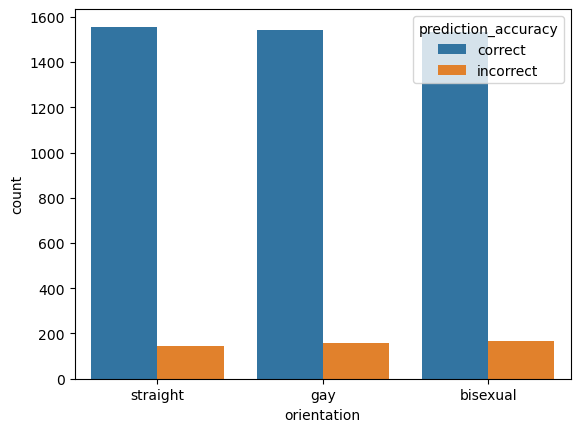

sex  prediction_accuracy
f    correct                0.936941
     incorrect              0.063059
m    correct                0.883636
     incorrect              0.116364
Name: proportion, dtype: float64


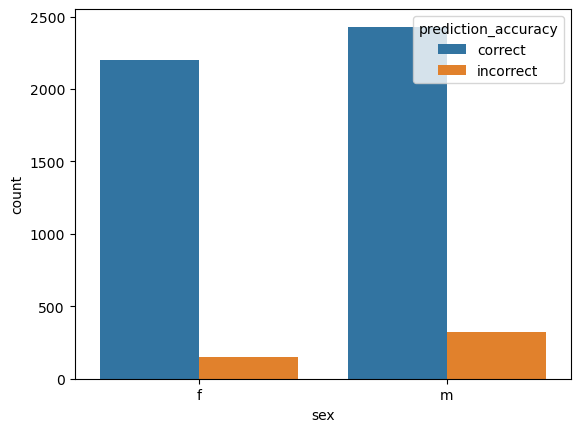

In [154]:
#importing the bagging classifier
from sklearn.ensemble import BaggingClassifier as BC

#creating random samples. The lowest represented group is bisexual with 1699 rows. Straight and gay will be limited to this.
straight_sample = profiles_dropna_essays[profiles_dropna_essays.orientation == "straight"].sample(n = 1699, random_state = 0)
gay_sample = profiles_dropna_essays[profiles_dropna_essays.orientation == "gay"].sample(n = 1699, random_state = 0)
bisexual_sample = profiles_dropna_essays[profiles_dropna_essays.orientation == "bisexual"]

#checking proportions of male vs female
print(straight_sample.sex.value_counts(normalize = True))
print(gay_sample.sex.value_counts(normalize = True))
print(bisexual_sample.sex.value_counts(normalize = True))
#proportions in line with the data analysis further up

#joining the tables together
equal_samples_df = pd.concat([straight_sample, gay_sample, bisexual_sample])
equal_samples_df = equal_samples_df.reset_index()
print(equal_samples_df["orientation"].value_counts()) #there are 1699 samples each
print(equal_samples_df.sex.value_counts(normalize = True)) #sample contains 57% male and 43% female, closer to the data distribution of male vs female

#identifying the feature and targets
features = equal_samples_df["essays_combined"]
target = equal_samples_df["sex"]

#splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

#creating a counter object and transforming the data
counter = CountVectorizer()
counter.fit(features)
x_train_counts = counter.transform(x_train)
x_test_counts = counter.transform(x_test)

#instantiating a bagging classifier for the Naieve Bayes classifier
model_3 = MultinomialNB()
bagging_model = BC(estimator = model_3, n_estimators = 10, random_state = 0)

#fitting the model and scoring it
bagging_model.fit(x_train_counts, y_train)
predictions = bagging_model.predict(x_test_counts)
bagging_score = accuracy_score(y_test, predictions)
print(f"The score of the model with bagging with 10 estimators is {bagging_score}") #69.8% accuracy compared to the previous model.
#This is a little worse than the first model, my question is, is it still biased

print(classification_report(y_test, predictions))

#adding the predictions to the dataframe and adding a binary accuracy columns
overall_predictions = bagging_model.predict(counter.transform(features))
# print(overall_predictions)
equal_samples_df["sex_prediction"] = overall_predictions
# print(equal_samples_df["sex_prediction"].head())

#report of all data
print(classification_report(target, overall_predictions))

equal_samples_df["prediction_accuracy"] = equal_samples_df.apply(lambda x: "correct" if x["sex"] == x["sex_prediction"] else "incorrect", axis = 1)

#checking the proportions of correct and incorrect predictions
print(equal_samples_df.groupby("orientation").prediction_accuracy.value_counts(normalize = True))
# The model is slightly less accurate for straight people, 8.4% incorrect compared to 7.2% but is massively better for gay and bisexual, 9.2% and 9.8%
# compared to 16.4% and 17% respectively.

#plot of the information
sns.countplot(data = equal_samples_df, x = "orientation", hue = "prediction_accuracy")
plt.show()

#printing the results for misclassification by sex
print(equal_samples_df.groupby("sex").prediction_accuracy.value_counts(normalize = True))

sns.countplot(data = equal_samples_df, x = "sex", hue = "prediction_accuracy")
plt.show()

### Evaluating Bagging Method with 10 models

The samples that were taken allow for equal numbers of gay, straight and bisexual individuals. The random sampling has also produced a male vs female proportion closer to what the original dataset had (54% vs 46%). Due to the sex imbalances in the gay and bisexual groups, it would require specific numbered sampling from the straight group to bring these numbers into parity which is something would could be explored later.

Looking at the results above, the use of equal sampling and bagging has improved the consistency of the model for gay and bisexual people. It is more likely to misclassify an individual which I can only assume is due to the significant reduction in the amount of data used (5100 vs 29,000) in the bagging model. More data from gay and bisexual people is likely to better for improving model accuracy rather than running the model with more estimators in the long run.

Interestingly, the model is now more likely to misclassify a male participant than a female participant (11.3% vs 6.3%), almost double the rate. This could well be down the sample that has been used and a different sample could produce better results. A random state of 0 has been used for all sampling for reproducibility and consistency.

### Bagging with the original dataset

Above has showed that sampling for equal group sizes mixed with bagging has given rough parity between misclassifying different orientations, but flipped the misclassification of the genders. One final model I will consider if applying bagging to the original 29,000 dataset to see if this would improve the classification accuracy of orientation and sex.

In [158]:
#instantiating model and a bagging classifier
model_4 = MultinomialNB()
bagging_model_2 = BC(estimator = model_4, n_estimators = 10, random_state = 0)

#creating features and labels data
features = profiles_dropna_essays["essays_combined"]
target = profiles_dropna_essays["sex"]

#splitting into training and testing data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

#instantiating a counter object
counter_4 = CountVectorizer()

#fitting counter object and transforming data
counter_4.fit(features)
x_train_counts = counter_4.transform(x_train)
x_test_counts = counter_4.transform(x_test)

#fitting bagging classifier
bagging_model_2.fit(x_train_counts, y_train)

#testing_classifier
predictions = bagging_model_2.predict(x_test_counts)
bagging_model_2_accuracy = accuracy_score(y_test, predictions)
print(f"The model is {bagging_model_2_accuracy}% accurate in predicting a persons sex from the essays")

print(classification_report(y_test, predictions))

The model is 0.7711750920656176% accurate in predicting a persons sex from the essays
              precision    recall  f1-score   support

           f       0.70      0.74      0.72      2379
           m       0.82      0.79      0.81      3595

    accuracy                           0.77      5974
   macro avg       0.76      0.77      0.76      5974
weighted avg       0.77      0.77      0.77      5974



### Initial Conclusion

The model is 77.1% accurate in predicting a persons sex from their essay. This is inline with the original accuracy of the model without bagging of 77.2%. The ultimate question is, has it improved the misclassification accuracy of orientation and sex.

orientation  prediction_accuracy_bagging
bisexual     correct                        0.804002
             incorrect                      0.195998
gay          correct                        0.806504
             incorrect                      0.193496
straight     correct                        0.914076
             incorrect                      0.085924
Name: proportion, dtype: float64


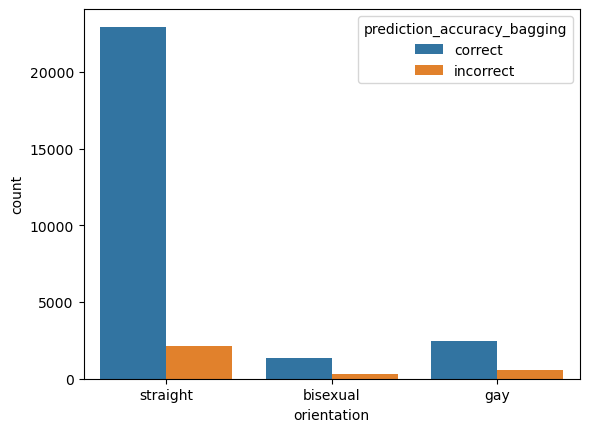

sex  prediction_accuracy_bagging
f    correct                        0.874179
     incorrect                      0.125821
m    correct                        0.911316
     incorrect                      0.088684
Name: proportion, dtype: float64


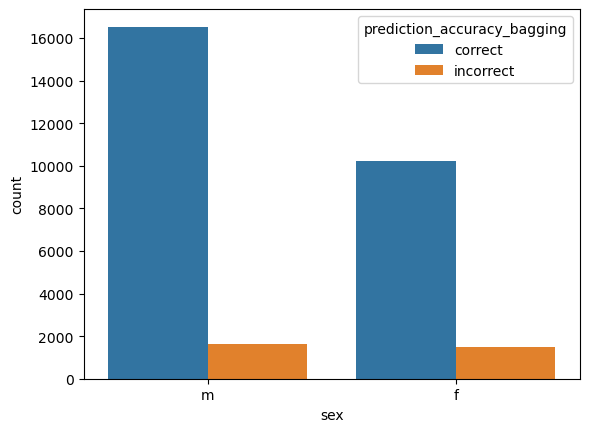

In [114]:
#adding the predictions column (separate one for bagging)
overall_predictions = bagging_model_2.predict(counter_4.transform(features))
profiles_dropna_essays["sex_prediction_bagging"] = overall_predictions
profiles_dropna_essays["prediction_accuracy_bagging"] = profiles_dropna_essays.apply(lambda x: "correct" if x["sex"] == x["sex_prediction_bagging"] else "incorrect", axis = 1)

#printing the proportions of correct predictions by orientation
print(profiles_dropna_essays.groupby("orientation").prediction_accuracy_bagging.value_counts(normalize = True))

#plot of the prediction accuracy
sns.countplot(data = profiles_dropna_essays, x = "orientation", hue = "prediction_accuracy_bagging")
plt.show()

#printing the proportions of correct predictions by sex
print(profiles_dropna_essays.groupby("sex").prediction_accuracy_bagging.value_counts(normalize = True))

#plot of the prediction accuracy
sns.countplot(data = profiles_dropna_essays, x = "sex", hue = "prediction_accuracy_bagging")
plt.show()

### Bagging Model Conclusion

Even though the model is broadly equally accurate on the testing data set, overall the model is less accurate than the model without bagging. Without bagging, the model misclassified straight, gay and bisexual participants 7.3%, 16.5% and 17% respectively. This model misclassifies the same groups 8.6%, 19.3% and 19.6% respectively.

Similarly, the model without bagging misclassified male and female participants 7.5% and 10.5% respectively. This model with bagging misclassifies them 8.9% and 12.6% respectively. This is all done with a random state of 0 and a different state may produce a model which is more accurate. A potential improvement to this could be assinging a weight to each sample so that the model is more likely to draw on the groups which are lesser represented. The precise values of these weights would need to be investigated and determined, maybe be considering proportions and assinging a value to each feature of male, female and straight, gay, bisexual.

# Overall Conclusion

Using a Naive Bayes classifier with the words used when answering the essay questions there does appear to be a difference in the language used between male and female participants as the classifier is able to classify an individual better than guessing (50/50). The most accurate model was produced by using all 29000 complete essays to train the model, however it was biased towards straight and male participants. The leased biased towards oritentation was found by sampling the dataset to produce equal counts of each orientation, however this was biased towards female participants. 

Further exploration of the Naive Bayes model could be done through more specific sampling methods of the dataset or investigating appropriate weights for each sample to produce a model which is more accurate at classifying and less biased towards a particular orientation or sex.

If, for whatever reason, a person did not list their sex on their profiles, it would be possible to use a classifier algorithm like Naive Bayes to identify a persons sex based on the language used in their essays. This is important as a persons sex is used when matching users based on their own sex and orientation. Whilst it is highly unlikely this information would be left blank as it is typically required during signup to most dating websites, the number of people not identifying with a particular gender is growing so options such as "prefer not to say" or "other" may be provided by the participant. This algorithm could be used to provide a probability that a person identifies more with a particular gender than another to improve matches.